# Grover's on $K_n$

Create a complete graph, delete some of the edges, and juxtapose the computations.

## Imports

Import our custom framework first

In [1]:
from graph_utils import groversearch, naivesearch, evaluators

Misc imports

In [2]:
from qiskit.tools.visualization import plot_histogram
from time import time

import matplotlib.pyplot as plt
import networkx as nx
import itertools
import random
import math
import scipy

%matplotlib inline

## Graph Creation

Set $n$ = $v$ = The number of vertices

In [3]:
n = int(input('Enter the value for n (# of vertices): '))

Enter the value for n (# of vertices):  7


Generate a complete graph...

In [4]:
edge_set = list(itertools.combinations(range(n), 2))

...and visualize it

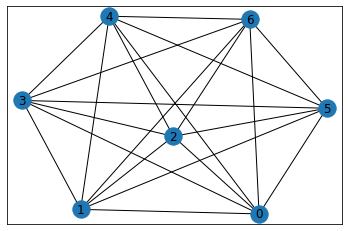

In [5]:
graph = nx.Graph()
graph.add_edges_from(edge_set)

fig = plt.figure()
ax = plt.axes()

nx.draw_networkx(graph, ax=ax)

### (Optional) Delete a subset of the edges to make the problem harder

In [6]:
del_perc = float(input('Percentage of edges to delete: ')) / 100

Percentage of edges to delete:  0


Delete the edges...

In [7]:
for _ in range(int(del_perc * len(edge_set))):
    random_edge = random.choice(edge_set)
    edge_set.remove(random_edge)
    
len(edge_set)

21

...and revisualize it

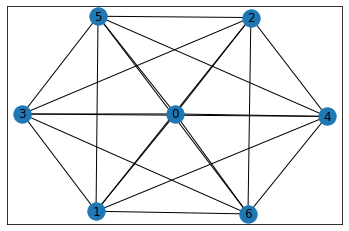

In [8]:
graph = nx.Graph()
graph.add_edges_from(edge_set)

fig = plt.figure()
ax = plt.axes()

nx.draw_networkx(graph, ax=ax)

## Report Constants

In [9]:
print("""
Vertices: {}
Edges: {}
Total Combinations: {}""".format(n, len(edge_set), 
                               math.comb(len(edge_set), n)))


Vertices: 7
Edges: 21
Total Combinations: 116280


## Compare the two solutions

### Naive search

In [10]:
evlr = evaluators.HamiltonianEvaluator(edge_set)

Recall that the naive search is simply going through all of the edge subsets and running the Hamiltonian cycle test.

In [11]:
start = time()
truth_table = evlr.generate_truth_table()
end = time()

print('It took {:.8f}s for the naive search'.format(end - start))

It took 14.20004344s for the naive search


Find out how many hamiltonian cycles there are and print them out

In [12]:
combinations = []
ham_cycles = []
for i, (comb, is_ham) in enumerate(truth_table.items()):
    combinations.append(comb)
    
    if is_ham:
        ham_cycles.append(i)
        
print('There are {} total hamiltonian cycles: \n'.format(len(ham_cycles)))
for i in ham_cycles:
    print(combinations[i])

There are 150 total hamiltonian cycles: 

((0, 1), (0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 6))
((0, 1), (0, 2), (1, 3), (2, 4), (3, 6), (4, 5), (5, 6))
((0, 1), (0, 2), (1, 3), (2, 5), (3, 4), (4, 6), (5, 6))
((0, 1), (0, 2), (1, 3), (2, 5), (3, 6), (4, 5), (4, 6))
((0, 1), (0, 2), (1, 3), (2, 6), (3, 4), (4, 5), (5, 6))
((0, 1), (0, 2), (1, 3), (2, 6), (3, 5), (4, 5), (4, 6))
((0, 1), (0, 2), (1, 4), (2, 3), (3, 5), (4, 6), (5, 6))
((0, 1), (0, 2), (1, 4), (2, 3), (3, 6), (4, 5), (5, 6))
((0, 1), (0, 2), (1, 4), (2, 5), (3, 4), (3, 6), (5, 6))
((0, 1), (0, 2), (1, 4), (2, 5), (3, 5), (3, 6), (4, 6))
((0, 1), (0, 2), (1, 4), (2, 6), (3, 4), (3, 5), (5, 6))
((0, 1), (0, 2), (1, 4), (2, 6), (3, 5), (3, 6), (4, 5))
((0, 1), (0, 2), (1, 5), (2, 3), (3, 4), (4, 6), (5, 6))
((0, 1), (0, 2), (1, 5), (2, 3), (3, 6), (4, 5), (4, 6))
((0, 1), (0, 2), (1, 5), (2, 4), (3, 4), (3, 6), (5, 6))
((0, 1), (0, 2), (1, 5), (2, 4), (3, 5), (3, 6), (4, 6))
((0, 1), (0, 2), (1, 5), (2, 6), (3, 4), (3, 5

### Grover's Search

Compute the min number of shots

In [13]:
shots = math.ceil(math.sqrt(len(combinations)))
shots #= 1024

341

Data preprocessing for qiskit

In [14]:
truth_map = groversearch.get_truth_map(truth_table)

Run Grovers

In [ ]:
result = groversearch.call_grover(truth_map, len(evlr.vertices),
                                  shots=shots)

Visualize the results

In [ ]:
plot_histogram(result['measurement'], title='Possible Hamiltonian Cycles\n for $K_{}$'.format(n))

## Binary2EdgeSet

In [ ]:
bin2edgeset = lambda bin_combo: combinations[int(str(bin_combo), 2)]
binary = input('Enter the binary representation: ')
print(bin2edgeset(binary))
print('Is hamiltonian?: {}'.format(truth_table[bin2edgeset(binary)]))